# Weather Station clustering

In [1]:
!pip install basemap==1.2.0 matplotlib==3.1

importing modules

In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", category=DeprecationWarning)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

getting the data

In [3]:
!wget -O weather-stations20140101-20141231.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv

--2022-07-22 10:17:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  --.-KB/s    in 0.002s  

2022-07-22 10:17:50 (50.5 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



In [4]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [5]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.shape

(1256, 25)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


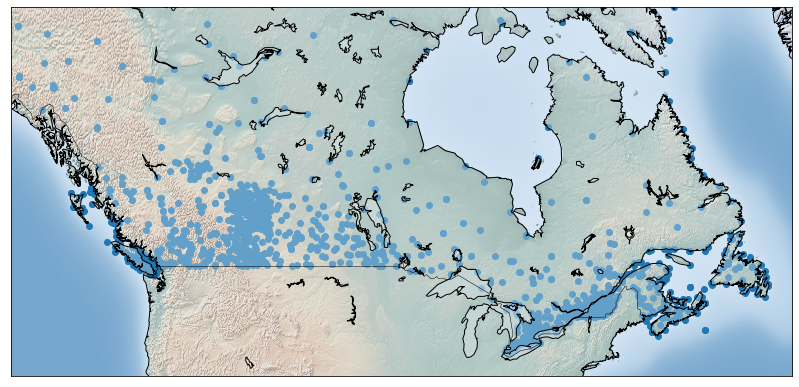

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# selecting size of the map
rcParams['figure.figsize'] = (14, 10)
# choosing the data under a specific region, canada and surrounding region
llon=-140
ulon=-50
llat=40
ulat=65
pdf = pdf[(pdf['Long']>llon)&(pdf['Long']<ulon)&(pdf['Lat']>llat)&(pdf['Lat']<ulat)]
# creating the base map object
my_map = Basemap(projection='merc', resolution = 'l', area_thresh=1000, llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
# To collect data based on stations        
# my_map makes the longitude and latitude value suitable for use in the map
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

my_map.scatter(pdf.xm, pdf.ym,  marker='o')
plt.show()

### Clustering only using the location

In [7]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

loc_data = pdf[['xm', 'ym']]
# replaces nan with 0 and infinity with large numbers
loc_data = np.nan_to_num(loc_data)
loc_data = StandardScaler().fit_transform(loc_data)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(loc_data)
labels = db.labels_
pdf["labels"]=labels
# number of the cluster including the outliers as a separate cluster
clusterNum = len(set(labels))
clusterNum


6

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


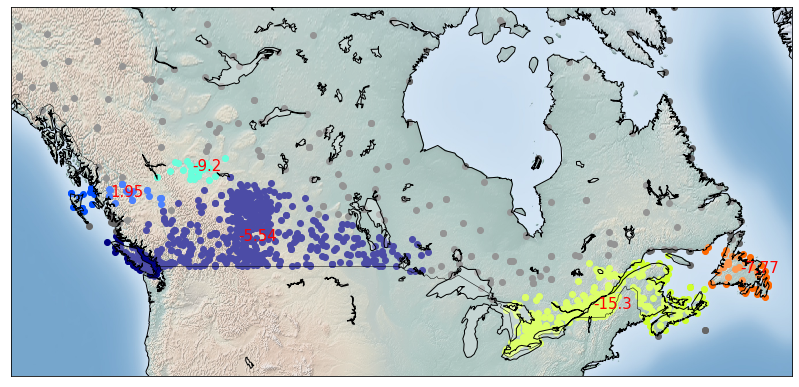

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
# prodcues the list of colour value, the no. of color value being equal to length of the second argument array
colors = plt.get_cmap('jet')(np.linspace(0, 1, clusterNum))
for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4])) if clust_number == -1 else colors[np.int(clust_number)]
    clust_set = pdf[pdf['labels'] == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color=c)
    if clust_number != -1:
        px = clust_set['xm'].mean()
        py = clust_set['ym'].mean()
        plt.text(px, py, str(round(float(clust_set['Tm'].mean()), 2)), fontsize=15, color='red')

### Clustering using location, min, max and mean of the temprature

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
Clust_data2 = pdf[['xm', 'ym', 'Tx', 'Tm', 'Tn']]
Clust_data2 = np.nan_to_num(Clust_data2)
Clust_data2 = StandardScaler().fit_transform(Clust_data2)
db = DBSCAN(eps=0.3, min_samples=10).fit(Clust_data2)
labels = db.labels_
pdf['labels2'] = labels
clust_num = len(set(labels))
clust_num

10

In [50]:
filt_df.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No', 'xm', 'ym', 'labels', 'labels2'],
      dtype='object')

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


[[0.         0.         0.5        1.        ]
 [0.         0.         0.99910873 1.        ]
 [0.         0.37843137 1.         1.        ]
 [0.         0.83333333 1.         1.        ]
 [0.30044276 1.         0.66729918 1.        ]
 [0.66729918 1.         0.30044276 1.        ]
 [1.         0.90123457 0.         1.        ]
 [1.         0.48002905 0.         1.        ]
 [0.99910873 0.07334786 0.         1.        ]
 [0.5        0.         0.         1.        ]]
0
1
2
3
4
5
6
7
8
-1


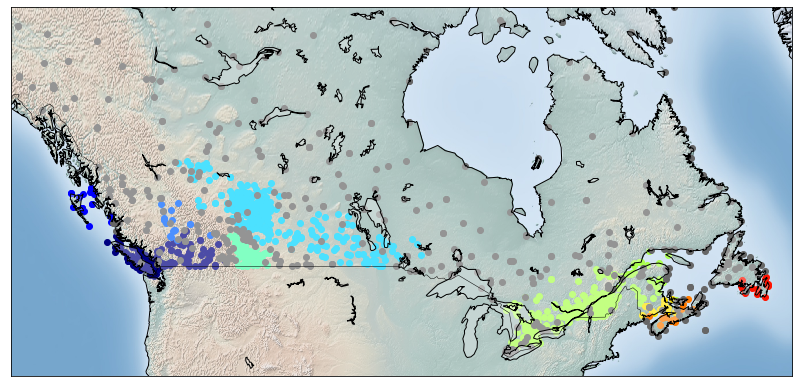

In [49]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14, 10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
colors = plt.get_cmap('jet')(np.linspace(0, 1, clust_num))
print(colors)
for label in set(labels):
    c = (([0.4, 0.4, 0.4]) if label == -1 else colors[np.int(label)])
    filt_df = pdf[pdf['labels2']==label]
    print(label)
    my_map.scatter(filt_df['xm'],filt_df['ym'], color = c, marker='o')
    if label != -1:
        mx = filt_df['xm'].mean()
        my = filt_df['ym'].mean()
        mT = filt_df['Tm'].mean()
        plt.text(mx, my, str(mT))